In [ ]:
# IMportinig Dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Importing datset
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_dataset.shape

(1599, 12)

In [ ]:
wine_dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualization

In [ ]:
# Stasticial Measures
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


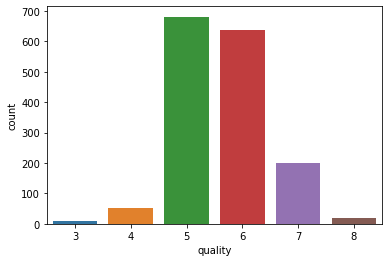

In [ ]:
sns.countplot(x='quality', data= wine_dataset)

In [ ]:
correlation = wine_dataset.corr()

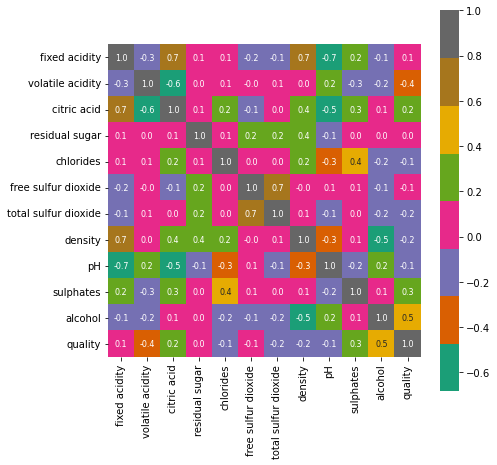

In [ ]:
plt.figure(figsize=(7,7))

sns.heatmap(correlation, cbar=True, cmap='Dark2', fmt='.1f', square=True,annot=True, annot_kws={'size':8})

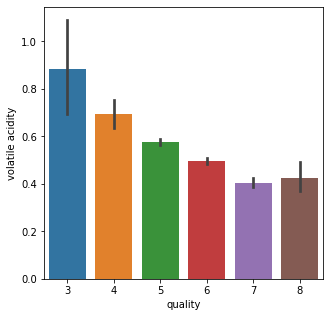

In [ ]:
plt.figure(figsize=(5,5))

sns.barplot(data=wine_dataset, x='quality', y='volatile acidity')

In [ ]:
# In the above plot it is seen thet volatile acidity is inversely proportional to wine quality

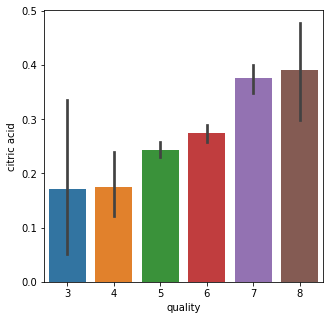

In [ ]:
plt.figure(figsize=(5,5))

sns.barplot(data=wine_dataset, x='quality', y='citric acid')

Data Preprocessing

In [ ]:
# Seprating the Label and Data
X = wine_dataset.drop(columns='quality', axis=1)

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization


In [ ]:
# Instead of taking all the labels from 3 to 8
# We can binarize those values i.e. making labels to 0 and 1 
# values 3 to 6 == Bad quality
# values 7< == Good Quality

Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [ ]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


Train and Test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) 

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model Training :

Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Evaluation

In [ ]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)

training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


In [ ]:
print("The training Data accuracy is : ",training_data_accuracy)

The training Data accuracy is :  1.0


In [ ]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("The test data accuracy is : ",test_data_accuracy)

The test data accuracy is :  0.828125


Making a predictive system

In [ ]:
input_data = (7.4,0.635,0.1,2.4,0.08,16.0,33.0,0.99736,3.58,0.69,10.8)

In [ ]:
input_nparray = np.asarray(input_data)

rehaped_array = input_nparray.reshape(1, -1)

prediction = model.predict(rehaped_array)

print(prediction)

if  prediction[0] == 0:
  print("Wine is bad Quality")
else:
  print("Wine is good quality")


[1]
Wine is good quality


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
